In [212]:
import os
import pandas as pd

In [213]:
# Get the directory with the notebooks, including its subdirectories
current_dir = os.getcwd()

# Get the directories with data and results
data_dir = os.path.join(current_dir, "data/debloating")
temporary_dir= os.path.join(current_dir, "temporary_data")
results_dir = os.path.join(current_dir, "results")

project_dir = os.path.dirname(current_dir)

print(project_dir, current_dir, results_dir, data_dir)

/home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption /home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption/notebooks /home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption/notebooks/results /home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption/notebooks/data/debloating


In [214]:
# Using this function, the purpose is to cancatenate all generated measurements for each repeated experiment 
def concatenate_csv_files(directory_path, output_file):
    file_list = os.listdir(directory_path)
    csv_files = [file for file in file_list if file.endswith(".csv")]

    if not csv_files:
        print("No CSV files found in the directory.")
        return

    dfs = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path, delimiter=';') # This is important, the delimiter
        
        filename_parts = file[:-4].split("_")  # Split filename and remove ".csv" extension        
        df['Program'] = filename_parts[0].split("-")[0]
        df['TestNr'] = filename_parts[0].split("-")[1]
        df['Utilities'] = filename_parts[1]
        dfs.append(df)

    concatenated_df = pd.concat(dfs, ignore_index=True)
    concatenated_df.to_csv(output_file, index=False, sep=';')  # Use semicolon as delimiter

    print(f"CSV files concatenated and saved to '{output_file}'.")

# All data into files in the folder save in a new CSV file
input_data = os.path.join(data_dir, 'repeat10/') # You need to change this for each new folder that you want to concatenate its files
output_data = os.path.join(results_dir, 'cat_repeat10.csv') # You need to change this for each new folder given above

concatenate_csv_files(input_data, output_data)

CSV files concatenated and saved to '/home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption/notebooks/results/cat_repeat10.csv'.


In [215]:
# Using this function, the purpose is to concatenate all resulting files from all 5 executions
def concatenate_allcsv_files(directory_path, output_file):
    file_list = os.listdir(directory_path)
    csv_files = [file for file in file_list if file.endswith(".csv")]

    if not csv_files:
        print("No CSV files found in the directory.")
        return

    dfs = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        df = pd.read_csv(file_path, delimiter=';') # This is important, the delimiter
        df['Repetition'] = file  # Add filename as a new column
        dfs.append(df)

    concatenated_df = pd.concat(dfs, ignore_index=True)
    concatenated_df.to_csv(output_file, index=False, sep=';')  # Use semicolon as delimiter


    print(f"CSV files concatenated and saved to '{output_file}'.")

# Save in a new CSV file
output_alldata = os.path.join(results_dir, 'cat_all_repeats.csv')

concatenate_allcsv_files(temporary_dir, output_alldata)

CSV files concatenated and saved to '/home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption/notebooks/results/cat_all_repeats.csv'.


In [216]:
# Now we need to find the average value of PSYS for all measurements of a program 
def calculate_average_PSYS(input_file, output_file):
    # Read the CSV file
    df = pd.read_csv(input_file, delimiter=';')
    
    # Calculate average of 'PSYS' column for each unique combination of 'Program' and 'Utilities'
    average_psys = df.groupby(['Program', 'Utilities'])['PSYS'].mean().reset_index()
    
    # Write the average values to a new file separated with a semicolon
    average_psys.to_csv(output_file, index=False, sep=';')
    
    print(f"Average PSYS values written to '{output_file}'.")

# Required inputs and outputs
input_data = os.path.join(results_dir, 'cat_all_repeats.csv')
output_data = os.path.join(results_dir, 'averagePSYS_all_repeats.csv')

calculate_average_PSYS(input_data, output_data)


Average PSYS values written to '/home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption/notebooks/results/averagePSYS_all_repeats.csv'.


In [217]:

def calculate_average_and_std_PSYS(input_file, output_file):
    # Read the CSV file
    df = pd.read_csv(input_file, delimiter=';')
    
    # Convert 'PSYS' values from microjoules to joules
    # df['PSYS'] = df['PSYS'] / 1000000  # 1 microjoule = 1e-6 joules

    # Calculate average of 'PSYS' column for each unique combination of 'Program' and 'Utilities'
    average_psys = df.groupby(['Program', 'Utilities'])['PSYS'].mean().reset_index()
    average_psys['PSYS'] = average_psys['PSYS'].round(2)  # Round the average values to 2 decimals

    # Calculate standard deviation of 'PSYS' column for each unique combination of 'Program' and 'Utilities'
    std_psys = df.groupby(['Program', 'Utilities'])['PSYS'].std().reset_index()
    std_psys['PSYS'] = std_psys['PSYS'].round(2)  # Round the standard deviation values to 2 decimals
    
    # Merge the average and standard deviation DataFrames based on 'Program' and 'Utilities' columns
    result_df = pd.merge(average_psys, std_psys, on=['Program', 'Utilities'], suffixes=('_avg', '_std'))

    # Write the average and standard deviation values to a new file separated with a semicolon
    result_df.to_csv(output_file, index=False, sep=';')

    print(f"Average PSYS and STD values written to '{output_file}'.")

# Required inputs and outputs
input_data = os.path.join(results_dir, 'cat_all_repeats.csv')
output_data = os.path.join(results_dir, 'averagePSYS_with_std_all_repeats.csv')

calculate_average_and_std_PSYS(input_data, output_data)

Average PSYS and STD values written to '/home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption/notebooks/results/averagePSYS_with_std_all_repeats.csv'.


In [218]:
import pandas as pd

# Required inputs and outputs
input_data = os.path.join(results_dir, 'averagePSYS_with_std_all_repeats.csv')
output_data = os.path.join(results_dir, 'averagePSYS_with_std_all_repeats_pivot.csv')

data = pd.read_csv(input_data, sep=';')

# Pivot the data to create new columns for GNU, ToyBox, and BusyBox
pivoted_data = data.pivot(index='Program', columns='Utilities', values=['PSYS_avg', 'PSYS_std'])

# Flatten the multi-level column index
pivoted_data.columns = [f'{col[0]}_{col[1]}' for col in pivoted_data.columns]

# Reset the index to make 'Program' a regular column again
pivoted_data = pivoted_data.reset_index()

pivoted_data.to_csv(output_data, index=False, sep=';')

# Display the reorganized data
print(pivoted_data)


     Program  PSYS_avg_BusyBox  PSYS_avg_GNU  PSYS_avg_ToyBox  \
0     base64      4.303545e+05  3.495048e+05     9.077979e+05   
1   basename      2.937127e+05  2.940271e+05     2.926171e+05   
2        cat      3.755542e+07  2.125736e+06     1.517433e+09   
3      chmod      1.951976e+06  1.539669e+06     1.523403e+06   
4      cksum      2.458047e+08  1.139345e+07     2.062460e+08   
5       comm      1.208715e+08  5.506528e+07     3.383169e+08   
6         cp      1.112494e+08  1.088484e+08     1.474435e+08   
7        cut      4.932394e+06  2.207312e+06     1.139999e+07   
8       date      3.122152e+05  3.153679e+05     3.153069e+05   
9    dirname      3.100884e+05  3.215384e+05     3.122429e+05   
10        du      4.905932e+05  5.232377e+05     5.185350e+05   
11      echo      3.052972e+05  3.214469e+05     3.108848e+05   
12    expand      1.456601e+07  7.273004e+06     5.023578e+05   
13    factor      3.162590e+05  3.219719e+05     3.161642e+05   
14     false      3.05318

In [219]:
# Now we need to find the average value of PSYS and DURATION for all measurements of a program 
def calculate_average_PSYS_DURATION(input_file, output_file):
    # Read the CSV file
    df = pd.read_csv(input_file, delimiter=';')
    
    # Calculate average of 'PSYS' column for each unique combination of 'Program' and 'Utilities'
    average_psys = df.groupby(['Program', 'Utilities'])['PSYS'].mean().reset_index()
    
    # Calculate average of 'DURATION' column for each unique combination of 'Program' and 'Utilities'
    average_duration = df.groupby(['Program', 'Utilities'])['DURATION'].mean().reset_index()
    
    # Merge the two DataFrames based on 'Program' and 'Utilities'
    merged_df = pd.merge(average_psys, average_duration, on=['Program', 'Utilities'])
    
    # Write the average values to a new file separated with a semicolon
    merged_df.to_csv(output_file, index=False, sep=';')
    
    print(f"Average PSYS and DURATION values written to '{output_file}'.")

# Required inputs and outputs
input_data = os.path.join(results_dir, 'cat_all_repeats.csv')
output_data = os.path.join(results_dir, 'averageDURATION_all_repeats.csv')

calculate_average_PSYS_DURATION(input_data, output_data)

Average PSYS and DURATION values written to '/home/rlefeuvr/Documents/Workspace/Debloat/bloat-energy-consumption/notebooks/results/averageDURATION_all_repeats.csv'.


In [220]:
# After we need to put together the PSYS and Size values for each program in each of the 3 different implementations

csv_with_ec = os.path.join(results_dir, 'averagePSYS_all_repeats.csv')
csv_with_size = os.path.join(project_dir, 'inputs/programs.csv') 
output_file = os.path.join(results_dir, 'all_ec_bsize.csv')

# Read the first CSV file
df1 = pd.read_csv(csv_with_ec, delimiter=';')

# Read the second CSV file
df2 = pd.read_csv(csv_with_size, delimiter=';')

# Merge the two DataFrames based on 'Program' column
merged_df = pd.merge(df1, df2, on='Program')

# Add the 'Size' values for each 'Utilities' based on the Program and fillna with 0 if not found
df1['Size'] = merged_df.apply(lambda row: row[row['Utilities']], axis=1)

# Save the final DataFrame to a new CSV file, including 'Utilities' and 'PSYS' columns
df1.to_csv(output_file, index=False, sep=';')


In [221]:
# After we need to put together the PSYS and number of Configuration Options for each program in each of the 3 different implementations

csv_with_ec = os.path.join(results_dir, 'averagePSYS_all_repeats.csv')
csv_with_size = os.path.join(project_dir, 'inputs/programs_nr_options.csv') 
output_file = os.path.join(results_dir, 'all_ec_options.csv')

# Read the first CSV file
df1 = pd.read_csv(csv_with_ec, delimiter=';')

# Read the second CSV file
df2 = pd.read_csv(csv_with_size, delimiter=';')

# Merge the two DataFrames based on 'Program' column
merged_df = pd.merge(df1, df2, on='Program')

# Add the 'Size' values for each 'Utilities' based on the Program and fillna with 0 if not found
df1['Options'] = merged_df.apply(lambda row: row[row['Utilities']], axis=1)

# Save the final DataFrame to a new CSV file, including 'Utilities' and 'PSYS' columns
df1.to_csv(output_file, index=False, sep=';')


In [222]:
# Now we want to calculate the Peason correlation between the EC and Size 
# for all utilities in each 3 different implementations

# The Spearman correlation with the p-value

import pandas as pd
from scipy.stats import spearmanr

input_data = os.path.join(results_dir, 'all_ec_bsize.csv')
# Read the CSV file into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Size'] = pd.to_numeric(df['Size'])

# Calculate Spearman correlation and p-value for each 'Utilities' separately
results = df.groupby('Utilities').apply(lambda x: spearmanr(x['PSYS'], x['Size']))

# Extract the correlation coefficients and p-values
correlations = results.apply(lambda x: x.correlation)
p_values = results.apply(lambda x: x.pvalue)

# Combine correlations and p-values into a DataFrame
spearman_df = pd.DataFrame({'Spearman Correlation': correlations, 'p-value': p_values})

# Print the correlations and p-values
print(spearman_df )

           Spearman Correlation   p-value
Utilities                                
BusyBox                0.304741  0.114844
GNU                    0.251232  0.197196
ToyBox                 0.350017  0.067862


/tmp/ipykernel_492742/2963655384.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby('Utilities').apply(lambda x: spearmanr(x['PSYS'], x['Size']))


In [223]:
# The Pearson correlation with the p-value

import pandas as pd
from scipy.stats import pearsonr

input_data = os.path.join(results_dir, 'all_ec_bsize.csv')
# Read the CSV file into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Size'] = pd.to_numeric(df['Size'])

# Calculate Spearman correlation and p-value for each 'Utilities' separately
results = df.groupby('Utilities').apply(lambda x: pearsonr(x['PSYS'], x['Size']))

# Extract the correlation coefficients and p-values
correlations = results.apply(lambda x: x.correlation)
p_values = results.apply(lambda x: x.pvalue)

# Combine correlations and p-values into a DataFrame
pearson_df = pd.DataFrame({'Pearson Correlation': correlations, 'p-value': p_values})

# Print the correlations and p-values
print(pearson_df)

           Pearson Correlation   p-value
Utilities                               
BusyBox               0.115931  0.556889
GNU                   0.038002  0.847751
ToyBox               -0.050712  0.797741


/tmp/ipykernel_492742/2201131564.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby('Utilities').apply(lambda x: pearsonr(x['PSYS'], x['Size']))


In [241]:
def merge_correlation_dfs(spearman: pd.DataFrame, pearson: pd.DataFrame) -> pd.DataFrame:
    # Rename columns for clarity
    spearman = spearman.rename(columns={
        'Spearman Correlation': 'Spearman',
        'p-value': 'p-value_s'
    })
    
    pearson = pearson.rename(columns={
        'Pearson Correlation': 'Pearson',
        'p-value': 'p-value_p'
    })
    
    # Merge on index (Utilities)
    merged_df = spearman.merge(pearson, left_index=True, right_index=True)
    
    return merged_df
def print_latex_df(df: pd.DataFrame, filename: str = "output.tex"):
    latex_str = df.to_latex(index=True,
                            formatters={"name": str.upper},
                            float_format=lambda x: f"{x:.2g}")
    print(latex_str)
    with open(filename, "w") as f:
        f.write(latex_str)



In [225]:
merged_df = merge_correlation_dfs(spearman_df, pearson_df)
print_latex_df(merged_df, filename=os.path.join(results_dir, "correlation_size.tex"))


\begin{tabular}{lccc}
\toprule
 & \textbf{Spearman} & \textbf{p-value_s} & \textbf{Pearson} & \textbf{p-value_p} \\
Utilities &  &  &  &  \\
\midrule
BusyBox & 0.3 & 0.11 & 0.12 & 0.56 \\
GNU & 0.25 & 0.2 & 0.038 & 0.85 \\
ToyBox & 0.35 & 0.068 & -0.051 & 0.8 \\
\bottomrule
\end{tabular}



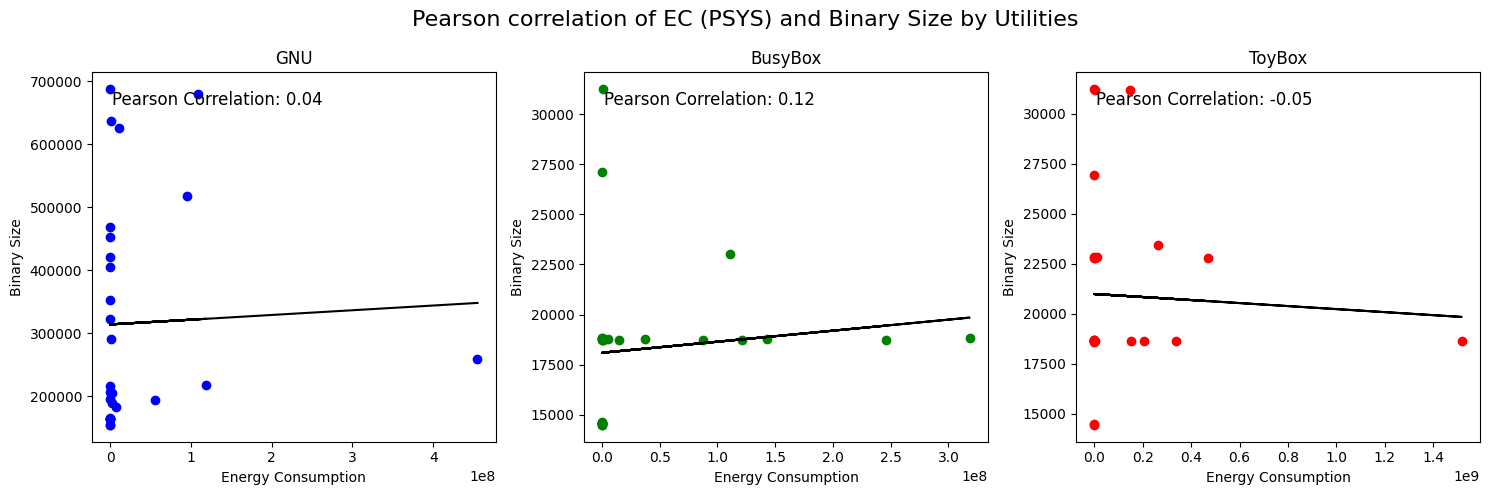

In [226]:
import pandas as pd
import numpy as np # It's needed for the "trend line"
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'all_ec_bsize.csv')
# First, we read the data from the CSV file with all experiments into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Size'] = pd.to_numeric(df['Size'])

# Create separate scatter plots for each utility with trend lines
utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=1, ncols=len(utilities), figsize=(15, 5))

for i, utility in enumerate(utilities):
    utility_df = df[df['Utilities'] == utility]
    axes[i].scatter(utility_df['PSYS'], utility_df['Size'], color=colors[i])
    axes[i].set_xlabel('Energy Consumption')
    axes[i].set_ylabel('Binary Size')
    axes[i].set_title(utility)

    # It calculate the Pearson correlation coefficient and shows it in the plot
    pearson_corr = utility_df[['PSYS', 'Size']].corr(method='pearson').iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Pearson Correlation: {pearson_corr:.2f}', 
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

    # Fit a linear regression line to the data points
    z = np.polyfit(utility_df['PSYS'], utility_df['Size'], 1)
    p = np.poly1d(z)
    axes[i].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# We set the overall title for all three figures
fig.suptitle('Pearson correlation of EC (PSYS) and Binary Size by Utilities', fontsize=16)

# We adjust the spacing between subplots
plt.tight_layout()

# Finally, we show the plots
plt.show()


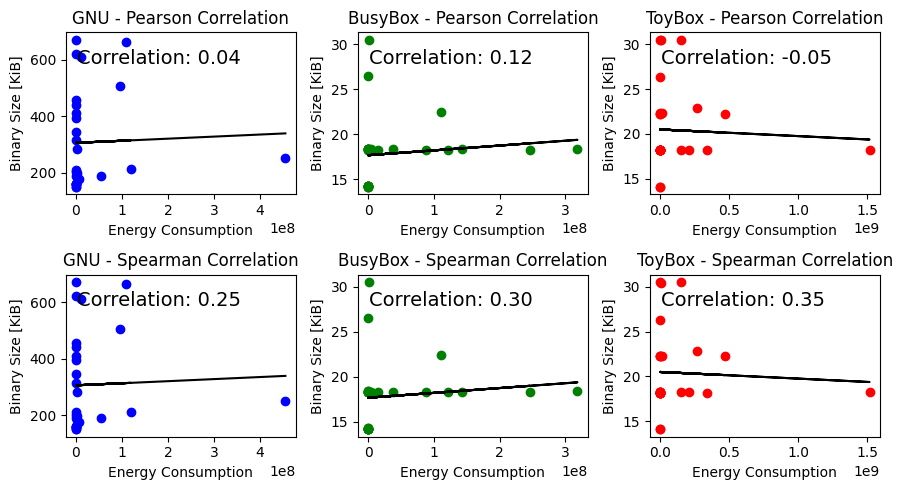

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'all_ec_bsize.csv')
df = pd.read_csv(input_data, delimiter=";")

df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Size'] = pd.to_numeric(df['Size'])

# Convert Binary Size values from bytes to kibibytes (KiB)
df['Size_KiB'] = df['Size'] / 1024

utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))

for i, utility in enumerate(utilities):
    row = i // 3
    col = i % 3

    utility_df = df[df['Utilities'] == utility]

    # Scatter plot with Pearson correlation
    axes[row, col].scatter(utility_df['PSYS'], utility_df['Size_KiB'], color=colors[i])
    axes[row, col].set_xlabel('Energy Consumption')
    axes[row, col].set_ylabel('Binary Size [KiB]')  # Updated y-axis label
    axes[row, col].set_title(f'{utility} - Pearson Correlation')

    pearson_corr = utility_df[['PSYS', 'Size_KiB']].corr(method='pearson').iloc[0, 1]
    axes[row, col].text(0.05, 0.90, f'Correlation: {pearson_corr:.2f}', 
                        transform=axes[row, col].transAxes, fontsize=14, verticalalignment='top')  # Increased fontsize

    z = np.polyfit(utility_df['PSYS'], utility_df['Size_KiB'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

    # Scatter plot with Spearman correlation
    axes[row + 1, col].scatter(utility_df['PSYS'], utility_df['Size_KiB'], color=colors[i])
    axes[row + 1, col].set_xlabel('Energy Consumption')
    axes[row + 1, col].set_ylabel('Binary Size [KiB]')  # Updated y-axis label
    axes[row + 1, col].set_title(f'{utility} - Spearman Correlation')

    spearman_corr = utility_df[['PSYS', 'Size_KiB']].corr(method='spearman').iloc[0, 1]
    axes[row + 1, col].text(0.05, 0.90, f'Correlation: {spearman_corr:.2f}', 
                            transform=axes[row + 1, col].transAxes, fontsize=14, verticalalignment='top')  # Increased fontsize

    z = np.polyfit(utility_df['PSYS'], utility_df['Size_KiB'], 1)
    p = np.poly1d(z)
    axes[row + 1, col].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# Adjust spacing between subplots
plt.tight_layout()

# Set the overall title for all charts
# fig.suptitle('Correlation of EC (PSYS) and Binary Size by Utilities', fontsize=16)

plt.show()


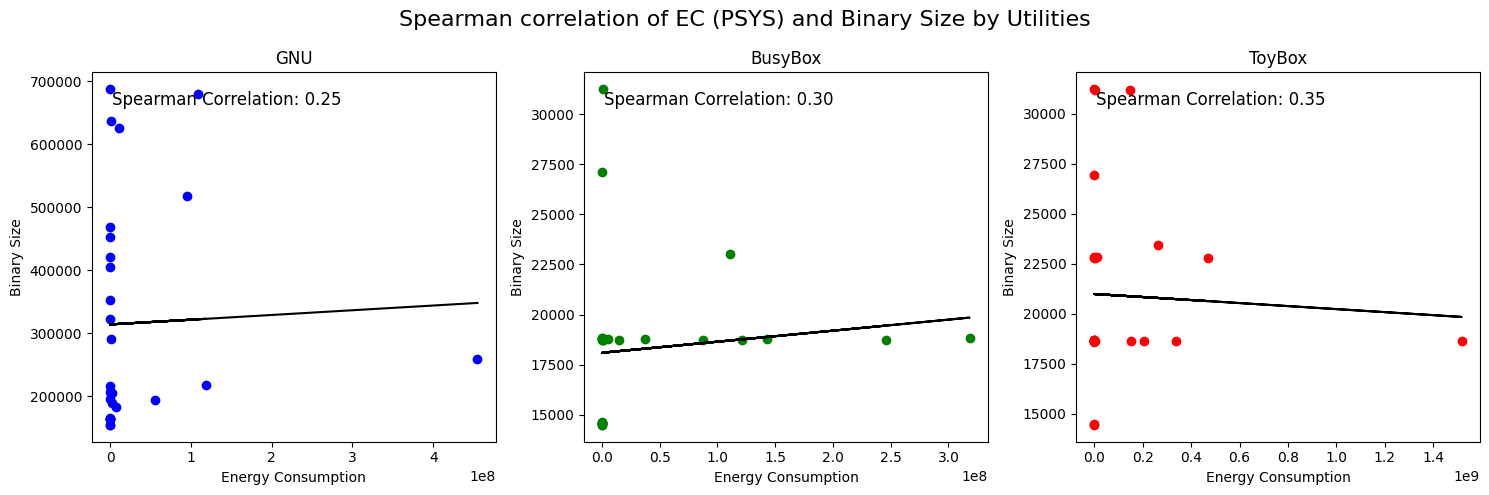

In [228]:
import pandas as pd
import numpy as np # It's needed for the "trend line"
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'all_ec_bsize.csv')
# First, we read the data from the CSV file with all experiments into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Size'] = pd.to_numeric(df['Size'])

# Create separate scatter plots for each utility with trend lines
utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=1, ncols=len(utilities), figsize=(15, 5))

for i, utility in enumerate(utilities):
    utility_df = df[df['Utilities'] == utility]
    axes[i].scatter(utility_df['PSYS'], utility_df['Size'], color=colors[i])
    axes[i].set_xlabel('Energy Consumption')
    axes[i].set_ylabel('Binary Size')
    axes[i].set_title(utility)

    # It calculates the Spearman correlation coefficient and show it in the plot
    spearman_corr = utility_df[['PSYS', 'Size']].corr(method='spearman').iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Spearman Correlation: {spearman_corr:.2f}', 
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

    # Fit a linear regression line to the data points
    z = np.polyfit(utility_df['PSYS'], utility_df['Size'], 1)
    p = np.poly1d(z)
    axes[i].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# We set the overall title for all three figures
fig.suptitle('Spearman correlation of EC (PSYS) and Binary Size by Utilities', fontsize=16)

# We adjust the spacing between subplots
plt.tight_layout()

# Finally, we show the plots
plt.show()

In [229]:
# Now we want to calculate the Peason correlation between the EC and Duration 
# for all utilities in each 3 different implementations

# The Spearman correlation with the p-value

import pandas as pd
from scipy.stats import spearmanr

input_data = os.path.join(results_dir, 'averageDURATION_all_repeats.csv')
# Read the CSV file into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['DURATION'] = pd.to_numeric(df['DURATION'])

# Calculate Spearman correlation and p-value for each 'Utilities' separately
results = df.groupby('Utilities').apply(lambda x: spearmanr(x['PSYS'], x['DURATION']))

# Extract the correlation coefficients and p-values
correlations = results.apply(lambda x: x.correlation)
p_values = results.apply(lambda x: x.pvalue)

# Combine correlations and p-values into a DataFrame
spearman_df = pd.DataFrame({'Spearman Correlation': correlations, 'p-value': p_values})

# Print the correlations and p-values
print(spearman_df)

           Spearman Correlation       p-value
Utilities                                    
BusyBox                0.959496  7.983564e-16
GNU                    0.891078  2.070780e-10
ToyBox                 0.965517  1.019583e-16


/tmp/ipykernel_492742/3546161601.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby('Utilities').apply(lambda x: spearmanr(x['PSYS'], x['DURATION']))


In [230]:
# The Pearson correlation with the p-value

import pandas as pd
from scipy.stats import pearsonr

input_data = os.path.join(results_dir, 'averageDURATION_all_repeats.csv')
# Read the CSV file into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['DURATION'] = pd.to_numeric(df['DURATION'])

# Calculate Spearman correlation and p-value for each 'Utilities' separately
results = df.groupby('Utilities').apply(lambda x: pearsonr(x['PSYS'], x['DURATION']))

# Extract the correlation coefficients and p-values
correlations = results.apply(lambda x: x.correlation)
p_values = results.apply(lambda x: x.pvalue)

# Combine correlations and p-values into a DataFrame
pearson_df = pd.DataFrame({'Pearson Correlation': correlations, 'p-value': p_values})

# Print the correlations and p-values
print(pearson_df)

           Pearson Correlation       p-value
Utilities                                   
BusyBox               0.998668  5.230304e-35
GNU                   0.998539  1.741551e-34
ToyBox                0.999771  6.001771e-45


/tmp/ipykernel_492742/95036515.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby('Utilities').apply(lambda x: pearsonr(x['PSYS'], x['DURATION']))


In [231]:
merged_df = merge_correlation_dfs(spearman_df, pearson_df)
print_latex_df(merged_df, filename=os.path.join(results_dir, "correlation_perf.tex"))


\begin{tabular}{lccc}
\toprule
 & \textbf{Spearman} & \textbf{p-value_s} & \textbf{Pearson} & \textbf{p-value_p} \\
Utilities &  &  &  &  \\
\midrule
BusyBox & 0.96 & 8e-16 & 1 & 5.2e-35 \\
GNU & 0.89 & 2.1e-10 & 1 & 1.7e-34 \\
ToyBox & 0.97 & 1e-16 & 1 & 6e-45 \\
\bottomrule
\end{tabular}



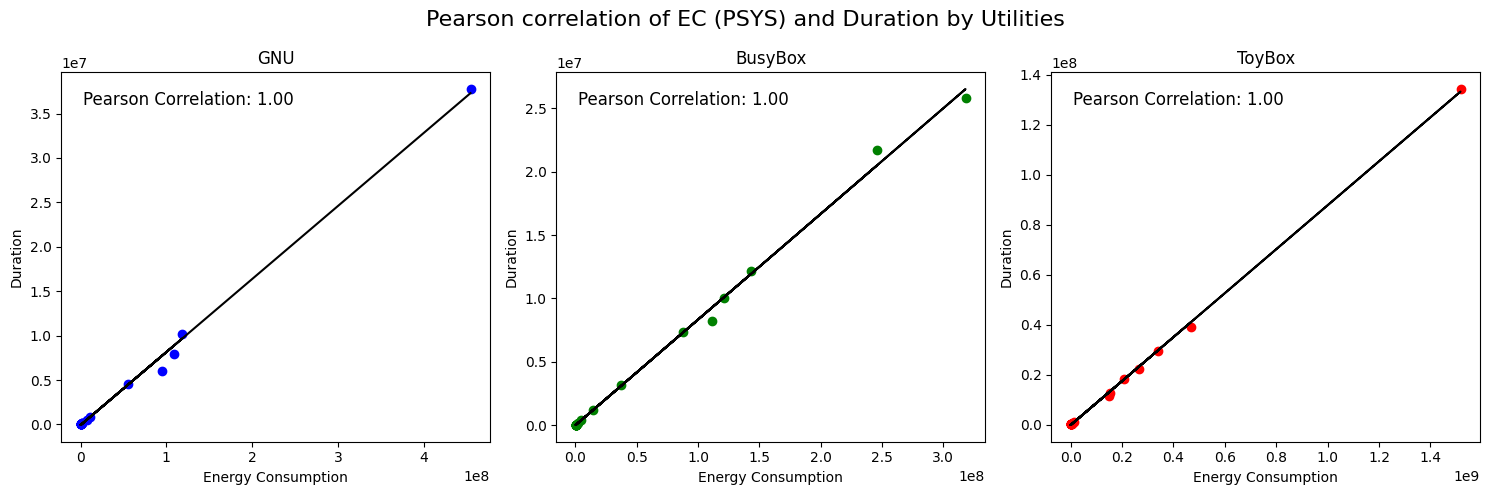

In [232]:
import pandas as pd
import numpy as np # It's needed for the "trend line"
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'averageDURATION_all_repeats.csv')
# First, we read the data from the CSV file with all experiments into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['DURATION'] = pd.to_numeric(df['DURATION'])

# Create separate scatter plots for each utility with trend lines
utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=1, ncols=len(utilities), figsize=(15, 5))

for i, utility in enumerate(utilities):
    utility_df = df[df['Utilities'] == utility]
    axes[i].scatter(utility_df['PSYS'], utility_df['DURATION'], color=colors[i])
    axes[i].set_xlabel('Energy Consumption')
    axes[i].set_ylabel('Duration')
    axes[i].set_title(utility)

    # It calculate the Pearson correlation coefficient and shows it in the plot
    pearson_corr = utility_df[['PSYS', 'DURATION']].corr(method='pearson').iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Pearson Correlation: {pearson_corr:.2f}', 
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

    # Fit a linear regression line to the data points
    z = np.polyfit(utility_df['PSYS'], utility_df['DURATION'], 1)
    p = np.poly1d(z)
    axes[i].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# We set the overall title for all three figures
fig.suptitle('Pearson correlation of EC (PSYS) and Duration by Utilities', fontsize=16)

# We adjust the spacing between subplots
plt.tight_layout()

# Finally, we show the plots
plt.show()

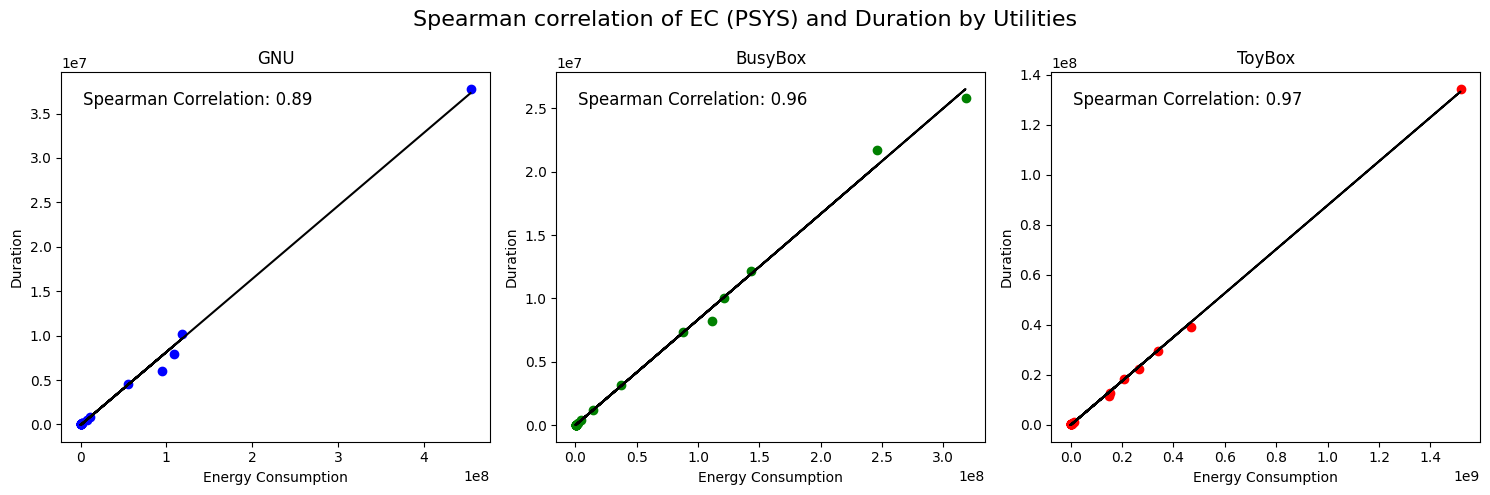

In [233]:
import pandas as pd
import numpy as np # It's needed for the "trend line"
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'averageDURATION_all_repeats.csv')
# First, we read the data from the CSV file with all experiments into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['DURATION'] = pd.to_numeric(df['DURATION'])

# Create separate scatter plots for each utility with trend lines
utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=1, ncols=len(utilities), figsize=(15, 5))

for i, utility in enumerate(utilities):
    utility_df = df[df['Utilities'] == utility]
    axes[i].scatter(utility_df['PSYS'], utility_df['DURATION'], color=colors[i])
    axes[i].set_xlabel('Energy Consumption')
    axes[i].set_ylabel('Duration')
    axes[i].set_title(utility)

    # It calculates the Spearman correlation coefficient and show it in the plot
    spearman_corr = utility_df[['PSYS', 'DURATION']].corr(method='spearman').iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Spearman Correlation: {spearman_corr:.2f}', 
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

    # Fit a linear regression line to the data points
    z = np.polyfit(utility_df['PSYS'], utility_df['DURATION'], 1)
    p = np.poly1d(z)
    axes[i].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# We set the overall title for all three figures
fig.suptitle('Spearman correlation of EC (PSYS) and Duration by Utilities', fontsize=16)

# We adjust the spacing between subplots
plt.tight_layout()

# Finally, we show the plots
plt.show()

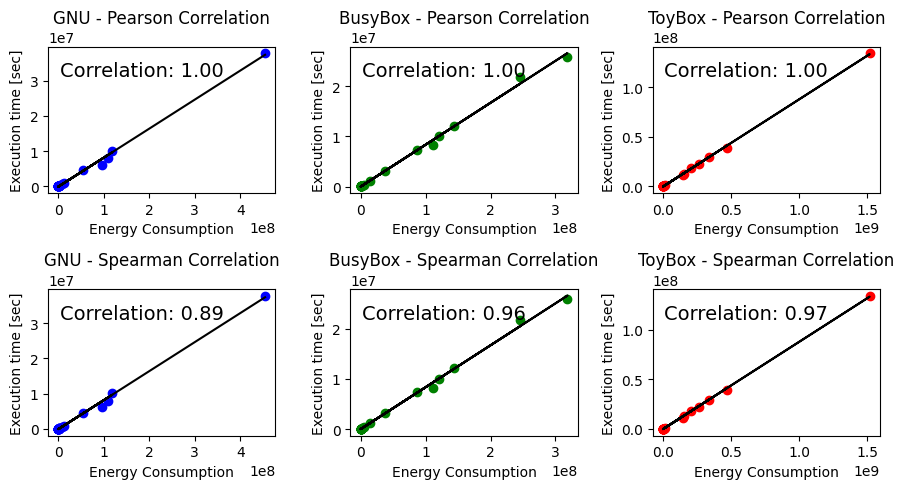

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'averageDURATION_all_repeats.csv')
df = pd.read_csv(input_data, delimiter=";")

df['PSYS'] = pd.to_numeric(df['PSYS'])
df['DURATION'] = pd.to_numeric(df['DURATION'])

utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))

for i, utility in enumerate(utilities):
    row = i // 3
    col = i % 3

    utility_df = df[df['Utilities'] == utility]

    # Scatter plot with Pearson correlation
    axes[row, col].scatter(utility_df['PSYS'], utility_df['DURATION'], color=colors[i])
    axes[row, col].set_xlabel('Energy Consumption')
    axes[row, col].set_ylabel('Execution time [sec]')
    axes[row, col].set_title(f'{utility} - Pearson Correlation')

    pearson_corr = utility_df[['PSYS', 'DURATION']].corr(method='pearson').iloc[0, 1]
    axes[row, col].text(0.05, 0.90, f'Correlation: {pearson_corr:.2f}', 
                        transform=axes[row, col].transAxes, fontsize=14, verticalalignment='top')

    z = np.polyfit(utility_df['PSYS'], utility_df['DURATION'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

    # Scatter plot with Spearman correlation
    axes[row + 1, col].scatter(utility_df['PSYS'], utility_df['DURATION'], color=colors[i])
    axes[row + 1, col].set_xlabel('Energy Consumption')
    axes[row + 1, col].set_ylabel('Execution time [sec]')
    axes[row + 1, col].set_title(f'{utility} - Spearman Correlation')

    spearman_corr = utility_df[['PSYS', 'DURATION']].corr(method='spearman').iloc[0, 1]
    axes[row + 1, col].text(0.05, 0.90, f'Correlation: {spearman_corr:.2f}', 
                            transform=axes[row + 1, col].transAxes, fontsize=14, verticalalignment='top')

    z = np.polyfit(utility_df['PSYS'], utility_df['DURATION'], 1)
    p = np.poly1d(z)
    axes[row + 1, col].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# Adjust spacing between subplots
plt.tight_layout()

# Set the overall title for all charts
# fig.suptitle('Correlation of EC (PSYS) and Binary Size by Utilities', fontsize=16)

plt.show()


In [235]:
# Now we want to calculate the Peason correlation between the EC and Number of Configuration Options 
# for all utilities in each 3 different implementations

# The Spearman correlation with the p-value

import pandas as pd
from scipy.stats import spearmanr

input_data = os.path.join(results_dir, 'all_ec_options.csv')
# Read the CSV file into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Options'] = pd.to_numeric(df['Options'])

# Calculate Spearman correlation and p-value for each 'Utilities' separately
results = df.groupby('Utilities').apply(lambda x: spearmanr(x['PSYS'], x['Options']))

# Extract the correlation coefficients and p-values
correlations = results.apply(lambda x: x.correlation)
p_values = results.apply(lambda x: x.pvalue)

# Combine correlations and p-values into a DataFrame
spearman_df = pd.DataFrame({'Spearman Correlation': correlations, 'p-value': p_values})

# Print the correlations and p-values
print(spearman_df)

           Spearman Correlation   p-value
Utilities                                
BusyBox                0.270593  0.163709
GNU                    0.460888  0.013575
ToyBox                 0.391512  0.039370


/tmp/ipykernel_492742/857230198.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby('Utilities').apply(lambda x: spearmanr(x['PSYS'], x['Options']))


In [236]:
# The Pearson correlation with the p-value

import pandas as pd
from scipy.stats import pearsonr

input_data = os.path.join(results_dir, 'all_ec_options.csv')
# Read the CSV file into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Options'] = pd.to_numeric(df['Options'])

# Calculate Spearman correlation and p-value for each 'Utilities' separately
results = df.groupby('Utilities').apply(lambda x: pearsonr(x['PSYS'], x['Options']))

# Extract the correlation coefficients and p-values
correlations = results.apply(lambda x: x.correlation)
p_values = results.apply(lambda x: x.pvalue)

# Combine correlations and p-values into a DataFrame
pearson_df = pd.DataFrame({'Pearson Correlation': correlations, 'p-value': p_values})

# Print the correlations and p-values
print(pearson_df)

           Pearson Correlation   p-value
Utilities                               
BusyBox               0.207760  0.288749
GNU                   0.080661  0.683256
ToyBox                0.120954  0.539807


/tmp/ipykernel_492742/4160909515.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df.groupby('Utilities').apply(lambda x: pearsonr(x['PSYS'], x['Options']))


In [237]:
merged_df = merge_correlation_dfs(spearman_df, pearson_df)
print_latex_df(merged_df , filename=os.path.join(results_dir, "correlation_options.tex"))

\begin{tabular}{lccc}
\toprule
 & \textbf{Spearman} & \textbf{p-value_s} & \textbf{Pearson} & \textbf{p-value_p} \\
Utilities &  &  &  &  \\
\midrule
BusyBox & 0.27 & 0.16 & 0.21 & 0.29 \\
GNU & 0.46 & 0.014 & 0.081 & 0.68 \\
ToyBox & 0.39 & 0.039 & 0.12 & 0.54 \\
\bottomrule
\end{tabular}



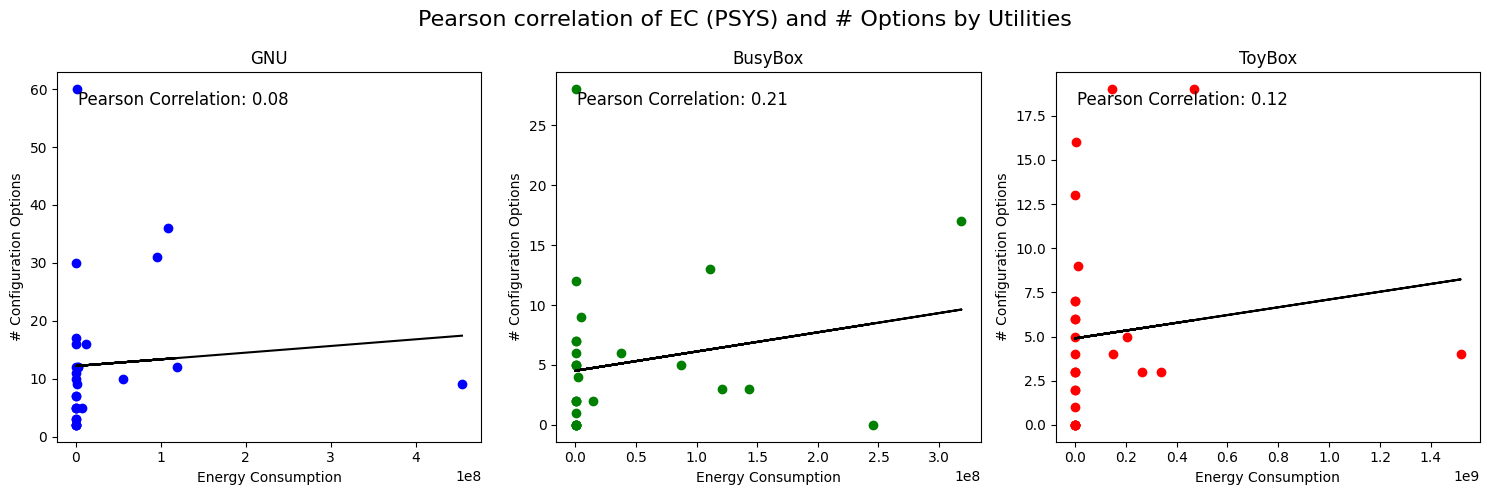

In [238]:
import pandas as pd
import numpy as np # It's needed for the "trend line"
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'all_ec_options.csv')
# First, we read the data from the CSV file with all experiments into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Options'] = pd.to_numeric(df['Options'])

# Create separate scatter plots for each utility with trend lines
utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=1, ncols=len(utilities), figsize=(15, 5))

for i, utility in enumerate(utilities):
    utility_df = df[df['Utilities'] == utility]
    axes[i].scatter(utility_df['PSYS'], utility_df['Options'], color=colors[i])
    axes[i].set_xlabel('Energy Consumption')
    axes[i].set_ylabel('# Configuration Options')
    axes[i].set_title(utility)

    # It calculate the Pearson correlation coefficient and shows it in the plot
    pearson_corr = utility_df[['PSYS', 'Options']].corr(method='pearson').iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Pearson Correlation: {pearson_corr:.2f}', 
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

    # Fit a linear regression line to the data points
    z = np.polyfit(utility_df['PSYS'], utility_df['Options'], 1)
    p = np.poly1d(z)
    axes[i].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# We set the overall title for all three figures
fig.suptitle('Pearson correlation of EC (PSYS) and # Options by Utilities', fontsize=16)

# We adjust the spacing between subplots
plt.tight_layout()

# Finally, we show the plots
plt.show()

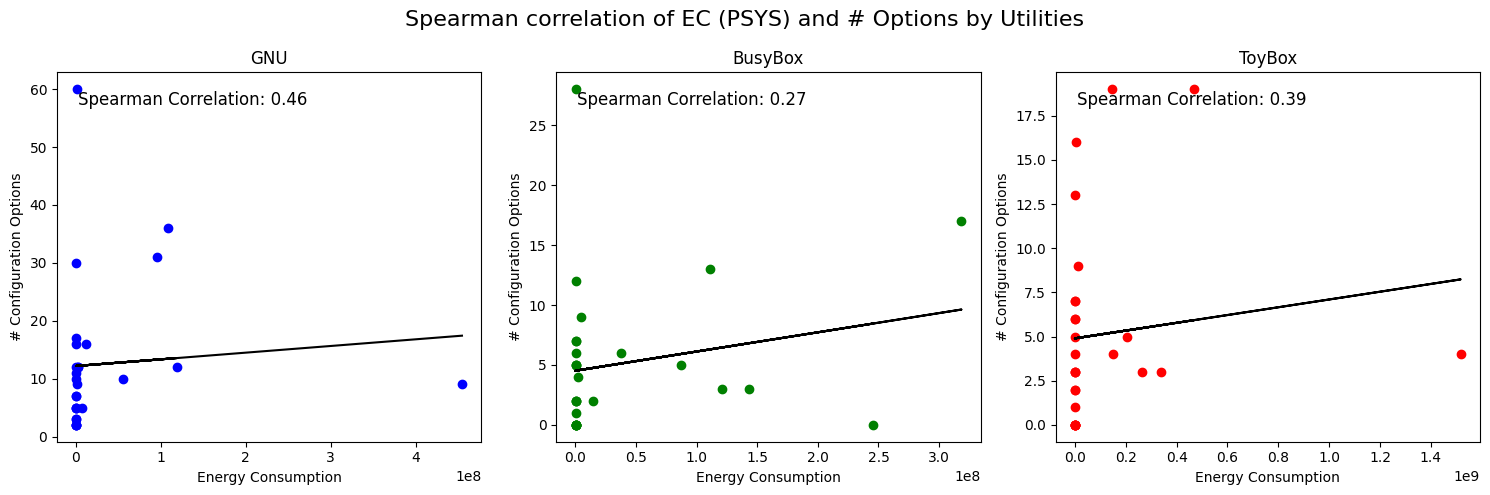

In [239]:
import pandas as pd
import numpy as np # It's needed for the "trend line"
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'all_ec_options.csv')
# First, we read the data from the CSV file with all experiments into a DataFrame
df = pd.read_csv(input_data, delimiter=";")

# Convert 'PSYS' and 'Size' columns to numeric
df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Options'] = pd.to_numeric(df['Options'])

# Create separate scatter plots for each utility with trend lines
utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=1, ncols=len(utilities), figsize=(15, 5))

for i, utility in enumerate(utilities):
    utility_df = df[df['Utilities'] == utility]
    axes[i].scatter(utility_df['PSYS'], utility_df['Options'], color=colors[i])
    axes[i].set_xlabel('Energy Consumption')
    axes[i].set_ylabel('# Configuration Options')
    axes[i].set_title(utility)

    # It calculates the Spearman correlation coefficient and show it in the plot
    spearman_corr = utility_df[['PSYS', 'Options']].corr(method='spearman').iloc[0, 1]
    axes[i].text(0.05, 0.95, f'Spearman Correlation: {spearman_corr:.2f}', 
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top')

    # Fit a linear regression line to the data points
    z = np.polyfit(utility_df['PSYS'], utility_df['Options'], 1)
    p = np.poly1d(z)
    axes[i].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# We set the overall title for all three figures
fig.suptitle('Spearman correlation of EC (PSYS) and # Options by Utilities', fontsize=16)

# We adjust the spacing between subplots
plt.tight_layout()

# Finally, we show the plots
plt.show()

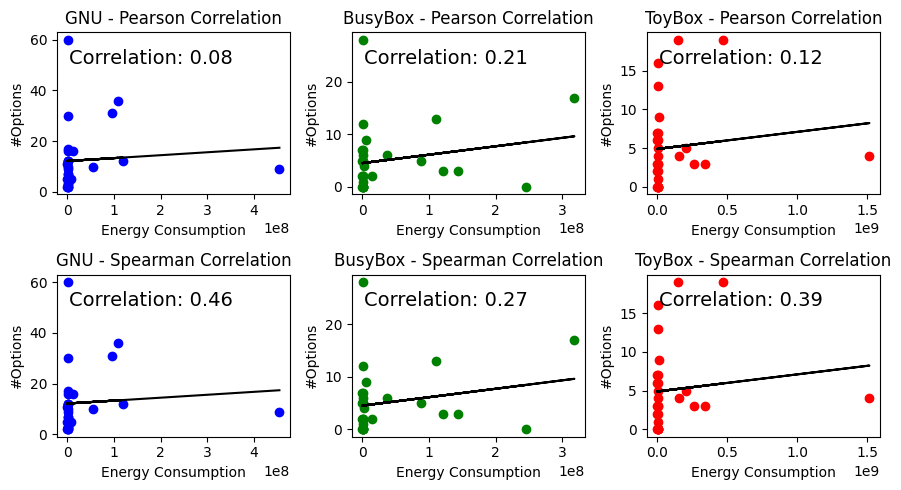

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input_data = os.path.join(results_dir, 'all_ec_options.csv')
df = pd.read_csv(input_data, delimiter=";")

df['PSYS'] = pd.to_numeric(df['PSYS'])
df['Options'] = pd.to_numeric(df['Options'])

utilities = ['GNU', 'BusyBox', 'ToyBox']
colors = ['blue', 'green', 'red']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(9, 5))

for i, utility in enumerate(utilities):
    row = i // 3
    col = i % 3

    utility_df = df[df['Utilities'] == utility]

    # Scatter plot with Pearson correlation
    axes[row, col].scatter(utility_df['PSYS'], utility_df['Options'], color=colors[i])
    axes[row, col].set_xlabel('Energy Consumption')
    axes[row, col].set_ylabel('#Options')  # Updated y-axis label
    axes[row, col].set_title(f'{utility} - Pearson Correlation')

    pearson_corr = utility_df[['PSYS', 'Options']].corr(method='pearson').iloc[0, 1]
    axes[row, col].text(0.05, 0.90, f'Correlation: {pearson_corr:.2f}', 
                        transform=axes[row, col].transAxes, fontsize=14, verticalalignment='top')  # Increased fontsize

    z = np.polyfit(utility_df['PSYS'], utility_df['Options'], 1)
    p = np.poly1d(z)
    axes[row, col].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

    # Scatter plot with Spearman correlation
    axes[row + 1, col].scatter(utility_df['PSYS'], utility_df['Options'], color=colors[i])
    axes[row + 1, col].set_xlabel('Energy Consumption')
    axes[row + 1, col].set_ylabel('#Options')  # Updated y-axis label
    axes[row + 1, col].set_title(f'{utility} - Spearman Correlation')

    spearman_corr = utility_df[['PSYS', 'Options']].corr(method='spearman').iloc[0, 1]
    axes[row + 1, col].text(0.05, 0.90, f'Correlation: {spearman_corr:.2f}', 
                            transform=axes[row + 1, col].transAxes, fontsize=14, verticalalignment='top')  # Increased fontsize

    z = np.polyfit(utility_df['PSYS'], utility_df['Options'], 1)
    p = np.poly1d(z)
    axes[row + 1, col].plot(utility_df['PSYS'], p(utility_df['PSYS']), color='black')

# Adjust spacing between subplots
plt.tight_layout()

# Set the overall title for all charts
# fig.suptitle('Correlation of EC (PSYS) and Binary Size by Utilities', fontsize=16)

plt.show()
